# Explore here

In [1]:
from dotenv import load_dotenv
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import f_classif,SelectKBest
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv')

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Eliminar Duplicados


In [3]:
df.drop_duplicates()
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
#que se puede hacer acá en vez de agregarle el promedio a los que digan 0? en el caso de los pliegues de la piel y la insulina
# se puede predecir la insulina con los datos menos la objetivo que es el outcome
cols_with_zeros = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

print("🔍 Cantidad de ceros ANTES del reemplazo:\n")
for col in cols_with_zeros:
    count_zeros = (df[col] == 0).sum()
    print(f"{col}: {count_zeros} ceros")

🔍 Cantidad de ceros ANTES del reemplazo:

Glucose: 5 ceros
BloodPressure: 35 ceros
SkinThickness: 227 ceros
Insulin: 374 ceros
BMI: 11 ceros


In [7]:
# Reemplazo de ceros por la media (sin contar los ceros)
for col in cols_with_zeros:
    mean_value = df[df[col] != 0][col].mean()
    df[col] = df[col].replace(0, mean_value)

In [8]:
print("\n✅ Cantidad de ceros DESPUÉS del reemplazo:\n")
for col in cols_with_zeros:
    count_zeros = (df[col] == 0).sum()
    print(f"{col}: {count_zeros} ceros")


✅ Cantidad de ceros DESPUÉS del reemplazo:

Glucose: 0 ceros
BloodPressure: 0 ceros
SkinThickness: 0 ceros
Insulin: 0 ceros
BMI: 0 ceros


In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Eliminar columnas si es necesario, en este caso, las columnas son necesarias.


paso 3: Análisis de variables univariante

análisis sobre variante categóricas: todas

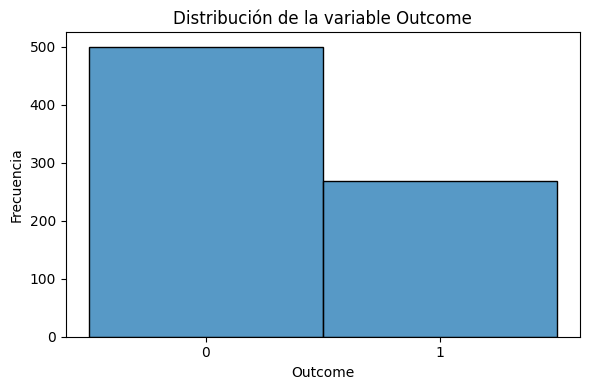

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Crear figura individual
fig, ax = plt.subplots(figsize=(6, 4))

# Histograma para Outcome
sns.histplot(ax=ax, data=df, x="Outcome", discrete=True)

# Asegurar que el eje X muestre solo 0 y 1
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.set_title("Distribución de la variable Outcome")
ax.set_xlabel("Outcome")
ax.set_ylabel("Frecuencia")

# Mostrar
plt.tight_layout()
plt.show()

En la muestra podemos observar que la cantidad de embarazos decrece a medida que hay mas hijos. la glucosa se distribuye normal en los estandares deseaados al igual que la presion en sangre. con los pliegues pasa algo parecido pero hay muchos blancos por lo que no se puede asegurar, hay un pico debido a que rellenamos los datos con el promedio, al igual que la insulina. el BMI se distribuye normal.
DiabetesPedigreeFunction
Predomina la gente joven en el estudio y la muestra dobla mas en los que no tienen diabetes a los que si la tienen.

paso 3: Análisis de variables univariante

Análisis sobre variables numéricas (De qué dependen que sea una o la otra)

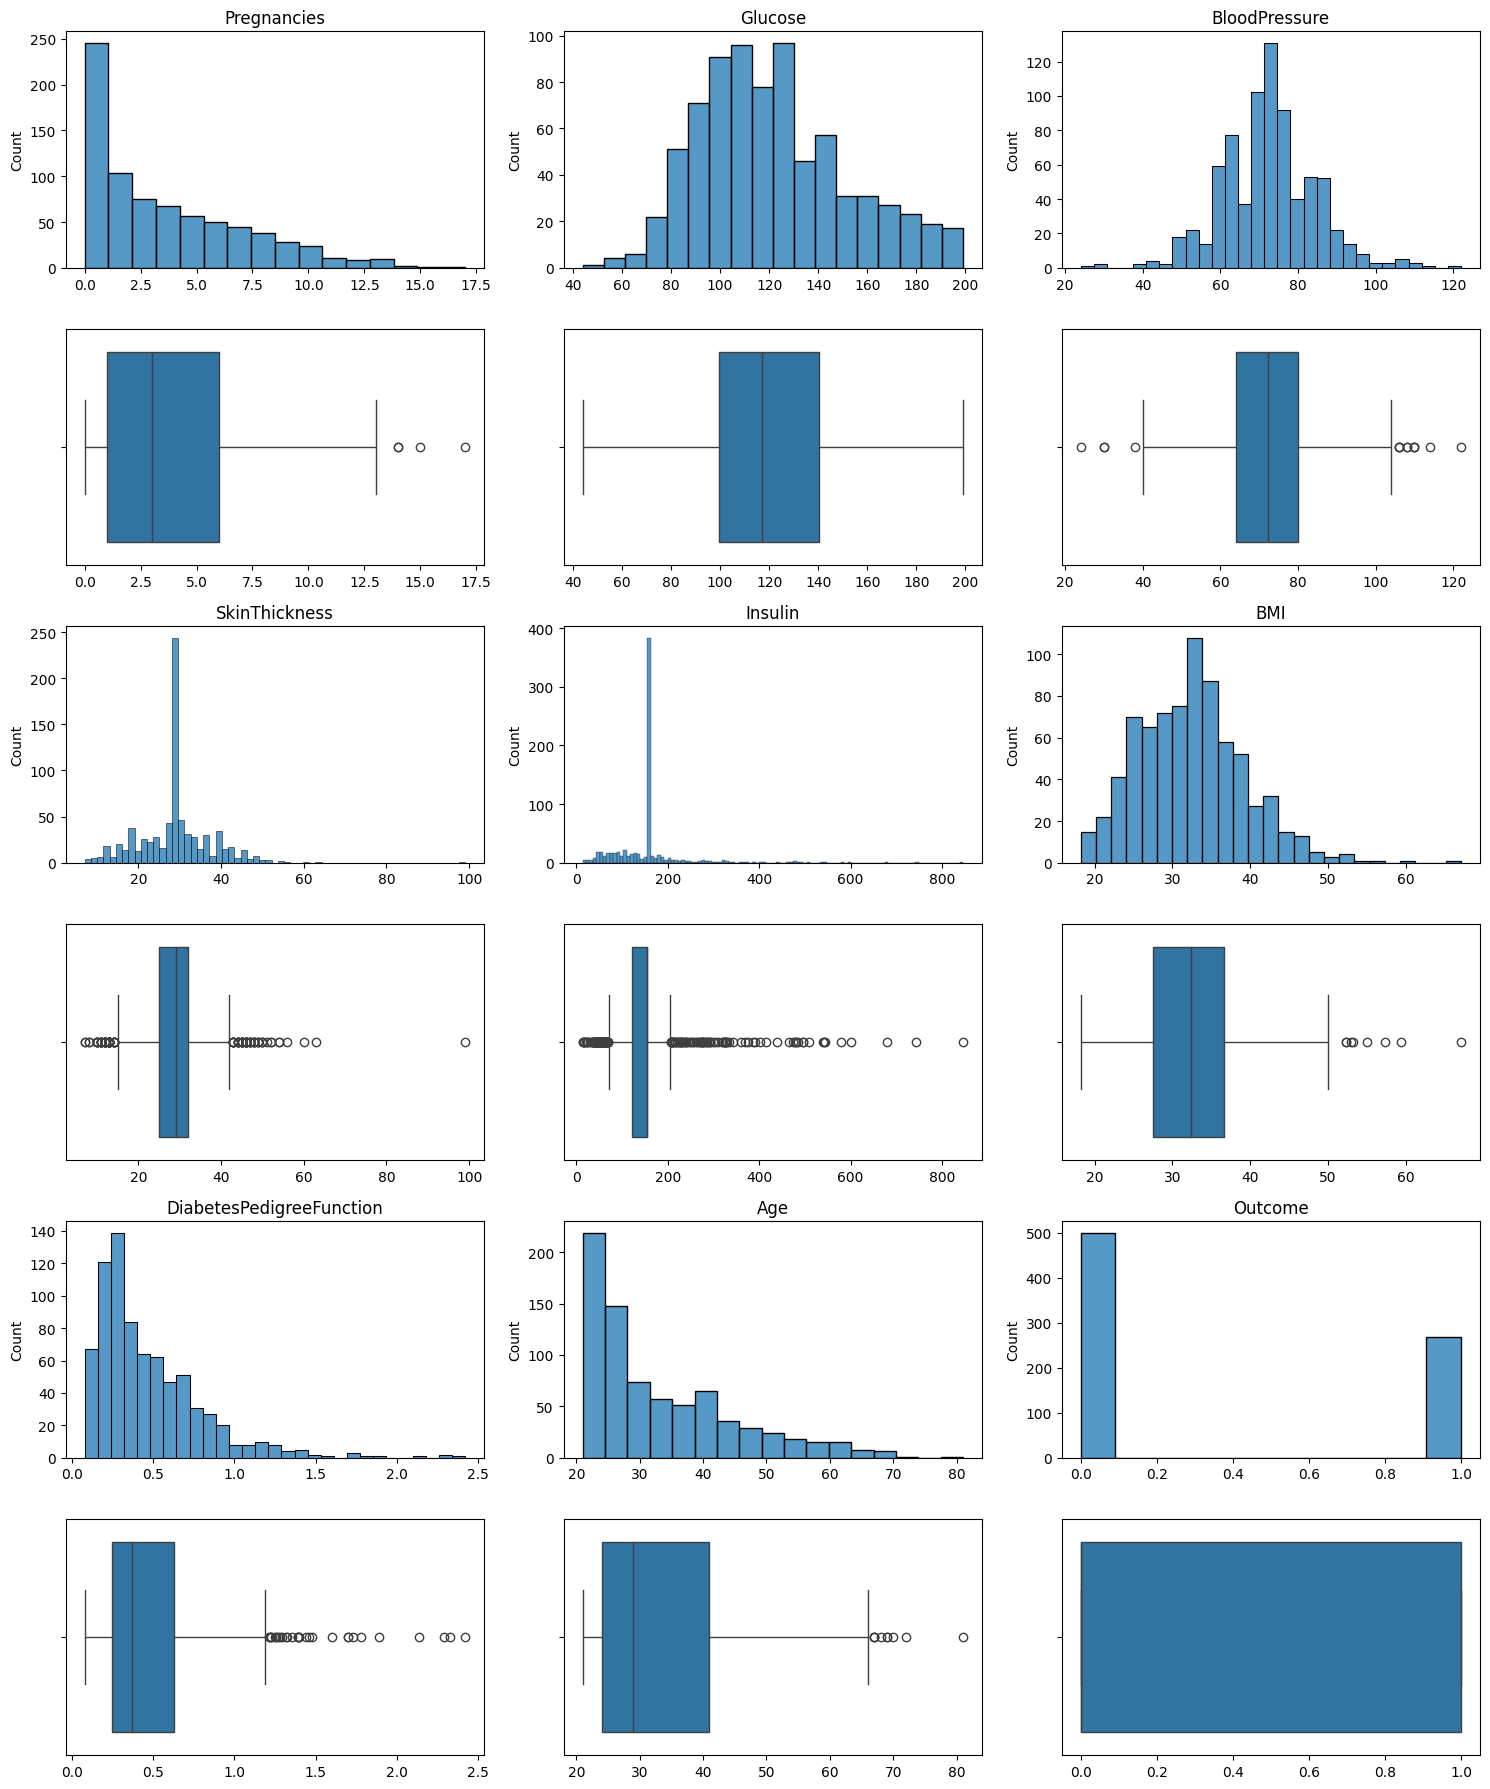

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de las 9 variables
variables = ['Pregnancies', 'Glucose', 'BloodPressure',
             'SkinThickness', 'Insulin', 'BMI',
             'DiabetesPedigreeFunction', 'Age', 'Outcome']

# Crear figura con 6 filas (3 variables × 2 tipos de gráfico) y 3 columnas
fig, axes = plt.subplots(6, 3, figsize=(15, 18))  # 6 filas x 3 columnas

# Graficar cada variable
for idx, var in enumerate(variables):
    col = idx % 3        # Columna (0, 1, 2)
    row = (idx // 3) * 2 # Fila base (0, 2, 4)

    # Histograma
    sns.histplot(ax=axes[row, col], data=df, x=var)
    axes[row, col].set_title(var)
    axes[row, col].set(xlabel=None)

    # Boxplot
    sns.boxplot(ax=axes[row + 1, col], data=df, x=var)
    axes[row + 1, col].set(xlabel=None)
    axes[row + 1, col].set(ylabel=None)

# Ajustar el layout
plt.tight_layout()
plt.show()

In [13]:
df[df["Age"] > 75]
#sacarlo

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [12]:
df = df.drop(index=459)

Paso 4: Análisis de variables multivariante

Análisis numerico numerico

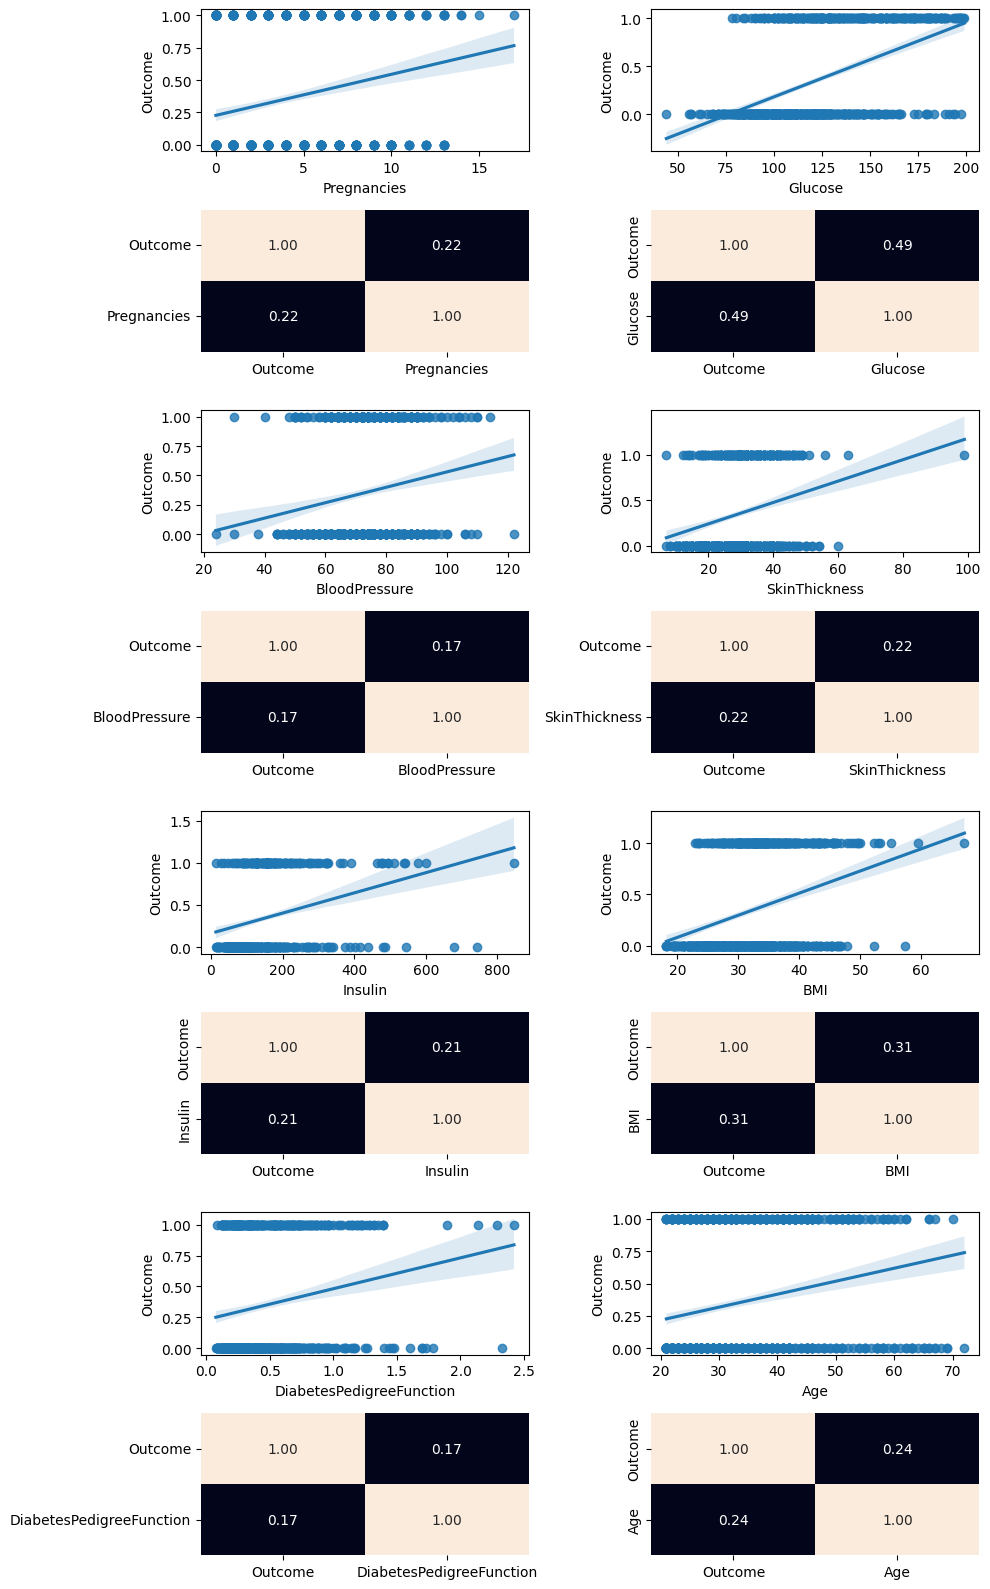

In [14]:
from utils import analisis_numerico_numerico_multivariante

analisis_numerico_numerico_multivariante(df,'Outcome',[])

Glucosa - bmi - age - pregnancies = antes de rellenar con la media


In [45]:
#borré esta columna porque creo que tiene poca correlación

#df.drop(["BloodPressure"], axis = 1, inplace = True)
#df.head()

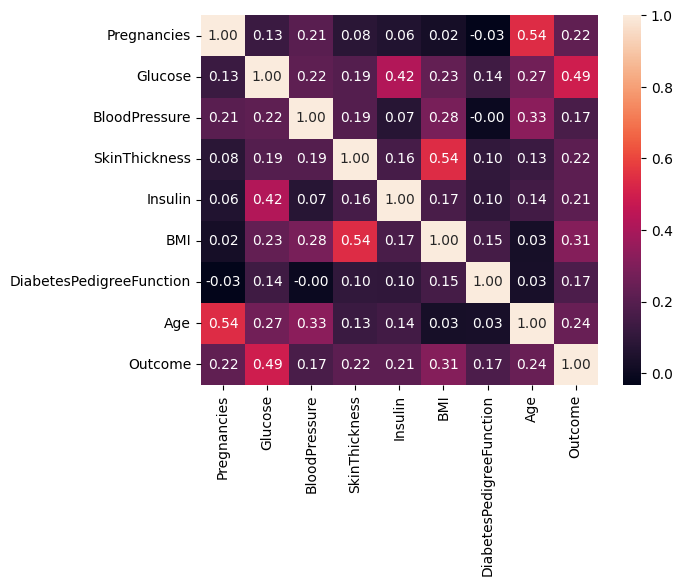

In [15]:
from utils import analisis_numerico_categorico

analisis_numerico_categorico(df)

si hay una gran correlacion con variables que no son objetivo, decido con cual quedarme

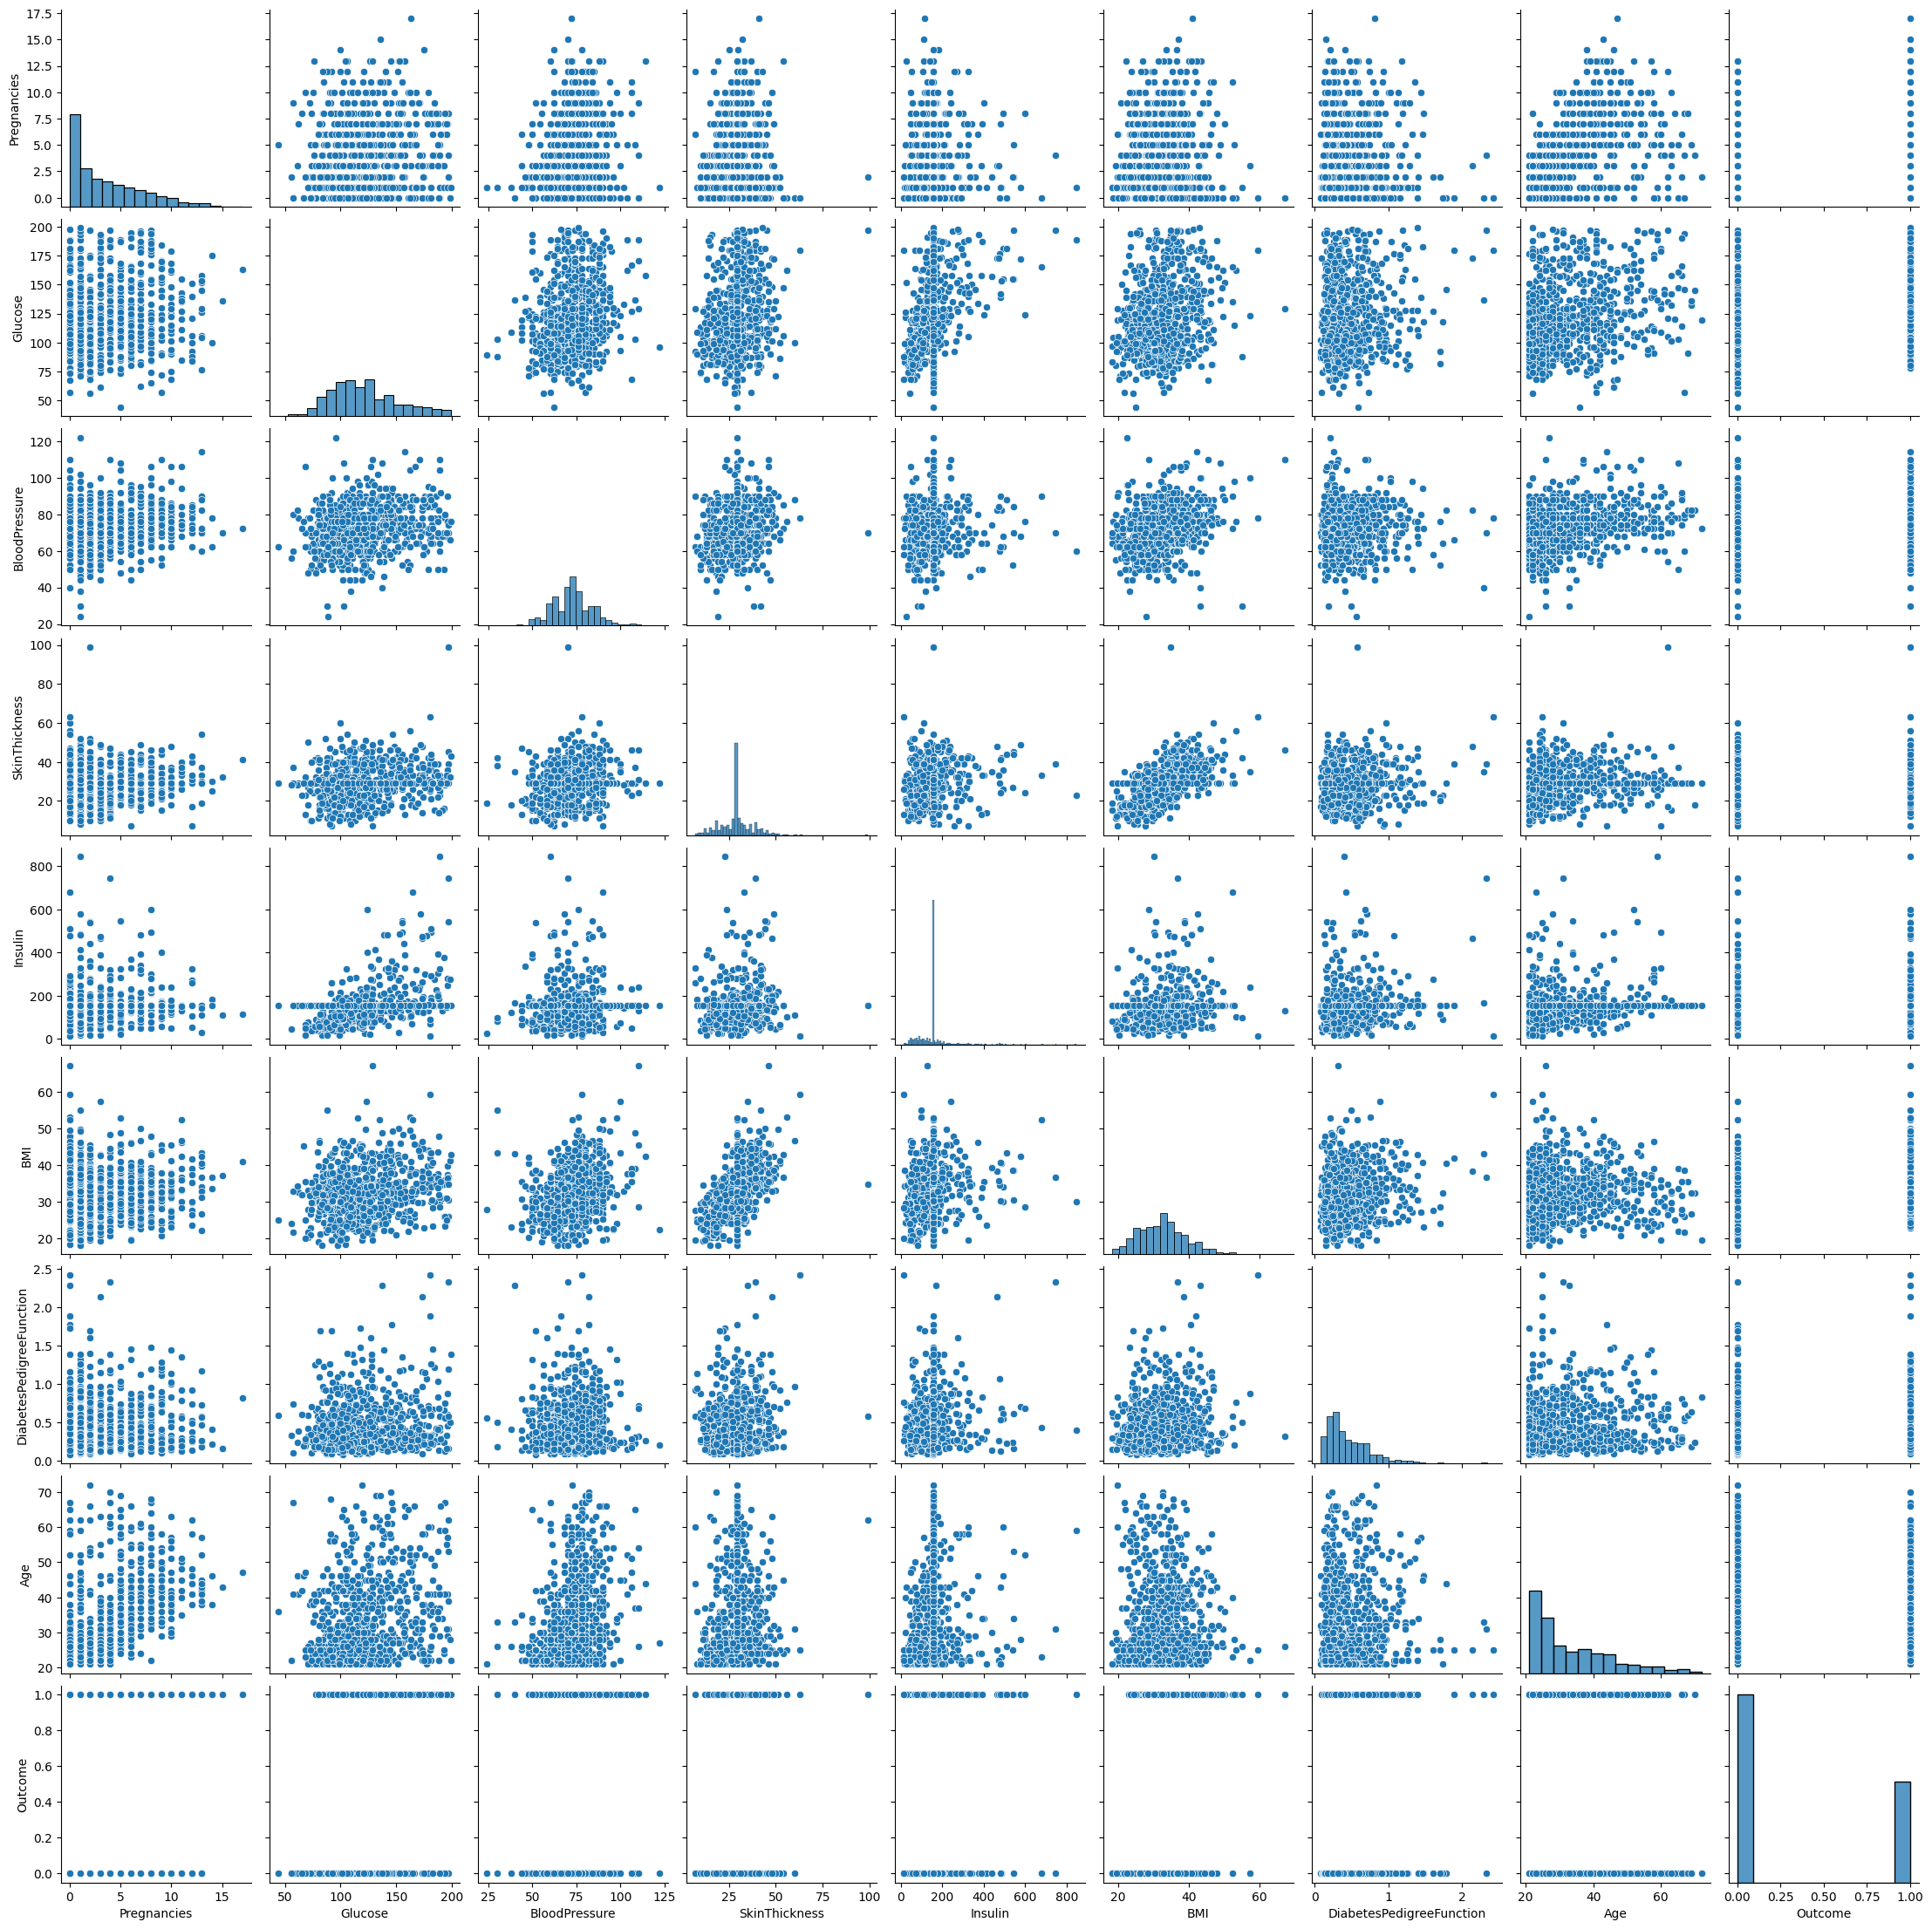

In [16]:
import seaborn as sns
sns.pairplot(data=df)

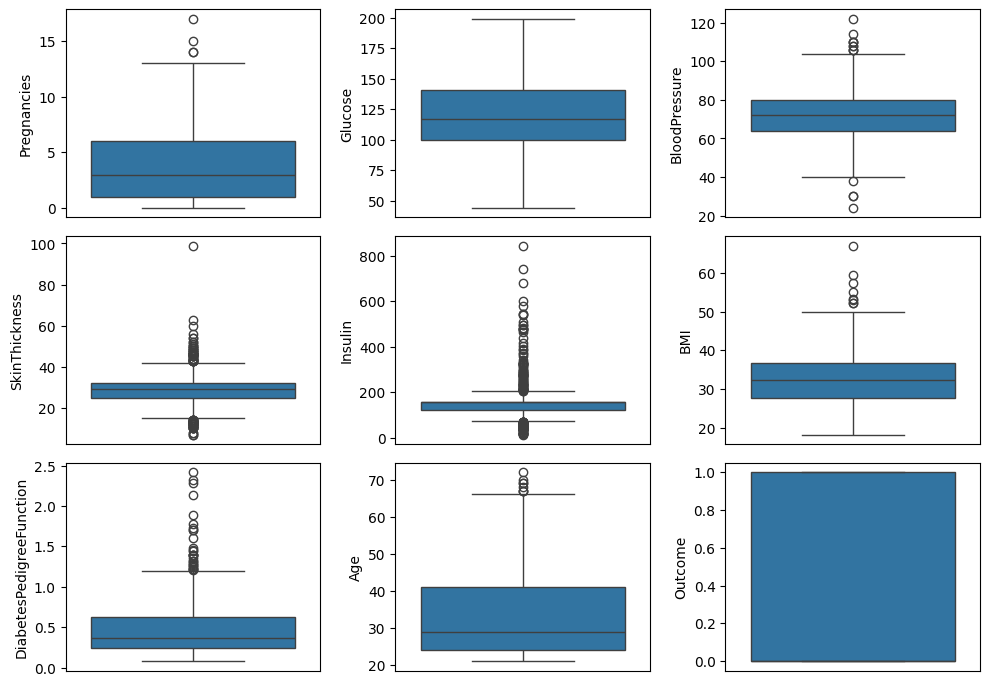

In [17]:
from utils import analisis_boxplot

analisis_boxplot(df,'Outcome')

In [18]:
from utils import analisis_ric

analisis_ric(df)

columna: Pregnancies limites superior 13.5 e inferior -6.5
columna: Glucose limites superior 202.0 e inferior 38.0
columna: BloodPressure limites superior 104.0 e inferior 40.0
columna: SkinThickness limites superior 42.5 e inferior 14.5
columna: Insulin limites superior 205.87055837563452 e inferior 71.67766497461929
columna: BMI limites superior 50.175000000000004 e inferior 13.975
columna: DiabetesPedigreeFunction limites superior 1.201 e inferior -0.3310000000000001
columna: Age limites superior 66.5 e inferior -1.5
columna: Outcome limites superior 2.5 e inferior -1.5


In [19]:
df.isnull().sum().sort_values(ascending=False)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [20]:
from sklearn.model_selection import train_test_split

X = df.drop('Outcome',axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84.0,72.405184,29.15342,155.548223,32.457464,0.304,21
555,7,124.0,70.000000,33.00000,215.000000,25.500000,0.161,37
346,1,139.0,46.000000,19.00000,83.000000,28.700000,0.654,22
294,0,161.0,50.000000,29.15342,155.548223,21.900000,0.254,65
231,6,134.0,80.000000,37.00000,370.000000,46.200000,0.238,46


In [21]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

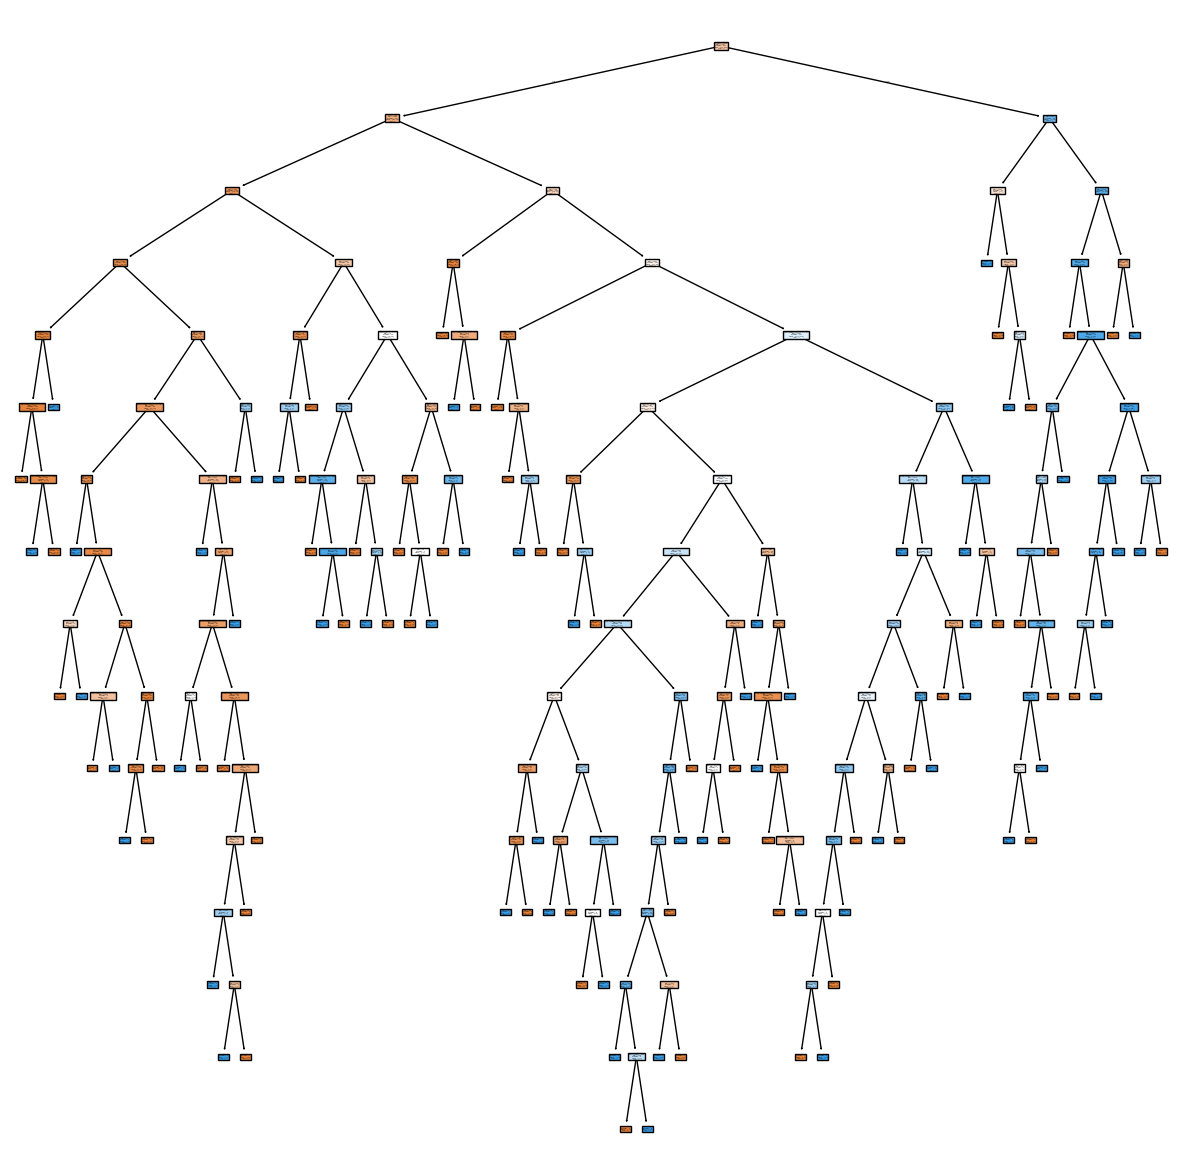

In [22]:
from sklearn import tree

fig = plt.figure(figsize=(15,15))

tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)

plt.show()

In [23]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0])

In [24]:
# antes de rellenar con las medias, el accuraccy era de 0,77 no incluyendo bloodpressure
# con el relleno de las medias y blood pressure es 0.72
# con el relleno y sin blood plessure es de 0,66
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.6818181818181818

In [25]:
model1 = DecisionTreeClassifier(random_state=42,criterion='entropy')
model2 = DecisionTreeClassifier(random_state=42,criterion='log_loss')

model1.fit(X_train,y_train)
model2.fit(X_train,y_train)

DecisionTreeClassifier(criterion='log_loss', random_state=42)

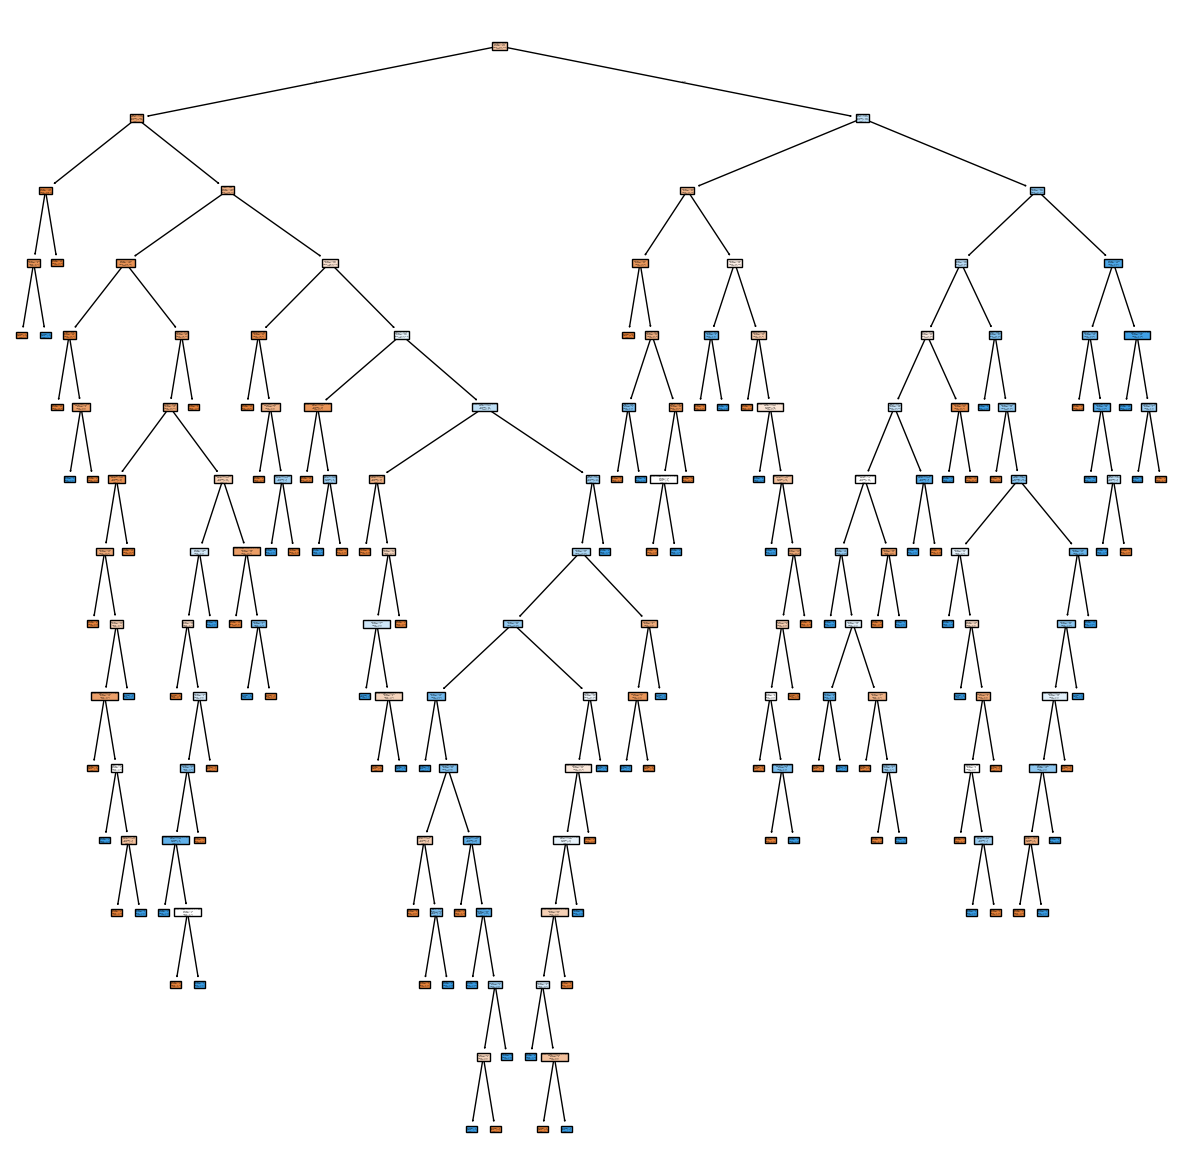

In [26]:
from sklearn import tree

fig = plt.figure(figsize=(15,15))

tree.plot_tree(model1, feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)

plt.show()

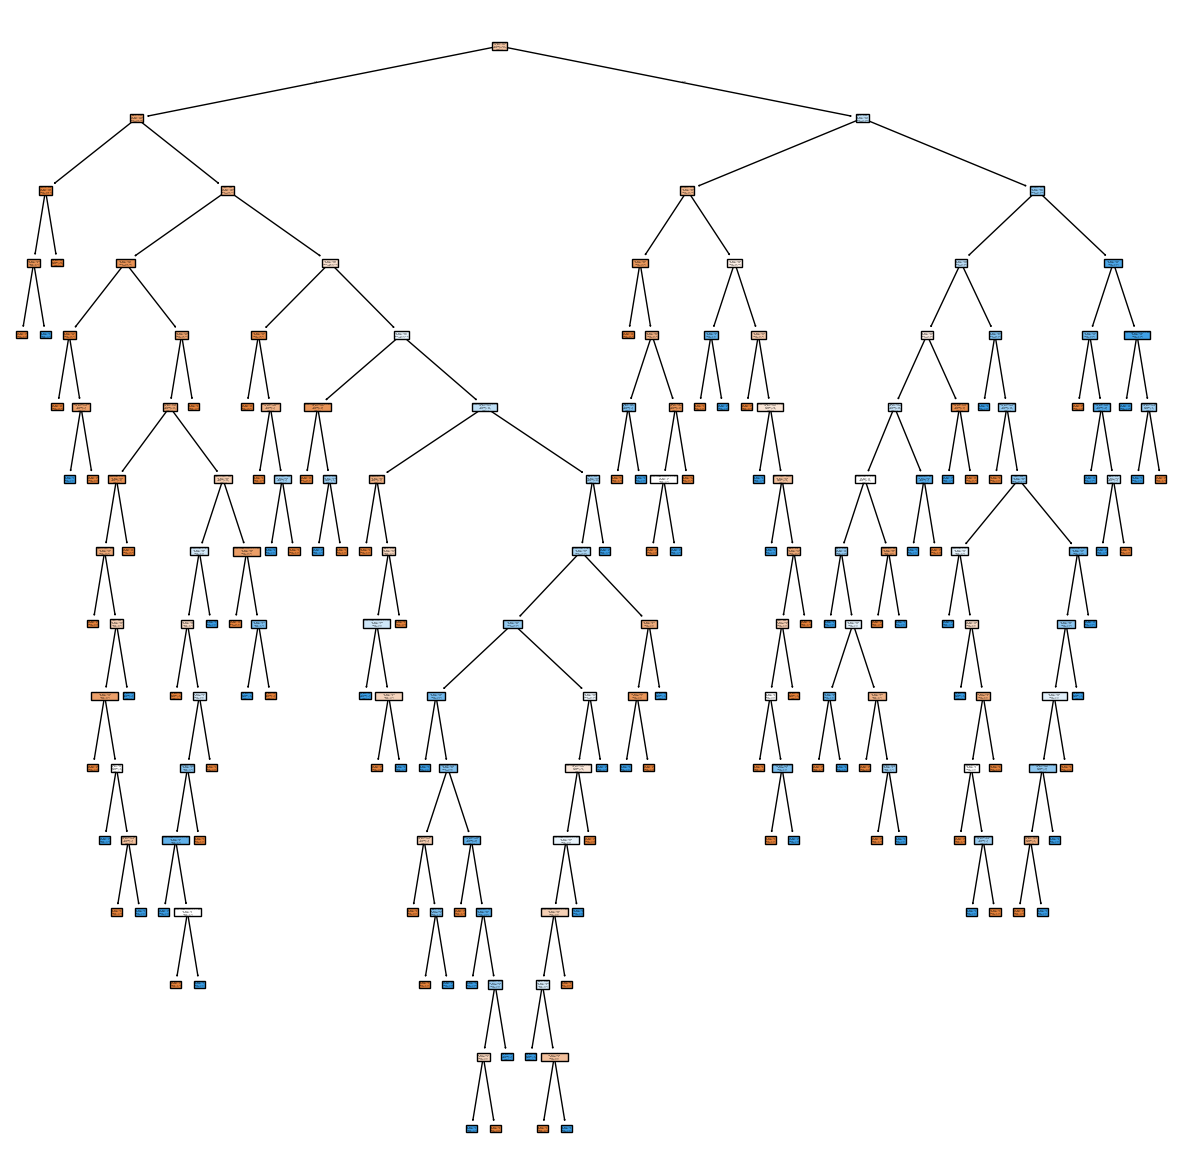

In [27]:
from sklearn import tree

fig = plt.figure(figsize=(15,15))

tree.plot_tree(model2, feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)

plt.show()

In [28]:
y_pred_entropy = model1.predict(X_test)
print(accuracy_score(y_test,y_pred_entropy))
y_pred_log_loss = model2.predict(X_test)
print(accuracy_score(y_test,y_pred_log_loss))

0.6558441558441559
0.6558441558441559


In [29]:
grid = {
    'criterion' : ['gini','log_loss','entropy'],
    'min_samples_split' : [2,4,6,8],
    'min_samples_leaf' : [1,2,4,6,8],
    'max_features' : ['auto','sqrt','log2',2,3,4,5]
}

from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(model,grid,scoring='accuracy')
clf.fit(X_train,y_train)

best_model = clf.best_estimator_

print(clf.best_params_)
print(clf.best_score_)

{'criterion': 'log_loss', 'max_features': 4, 'min_samples_leaf': 6, 'min_samples_split': 2}
0.7307077169132348


/home/vscode/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
300 fits failed out of a total of 2100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "/home/vscode/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/home/vscode/.l

In [30]:
best_model.feature_importances_

array([0.08803982, 0.34012615, 0.07917603, 0.07597123, 0.        ,
       0.13323829, 0.08816334, 0.19528514])

In [31]:
X_train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [32]:
from pickle import dump
dump(best_model,open('../models/decission_tree_clasiffier_42_log_loss_max_features_5_min_samples_leaf_8_min_samples_split_2.model','wb'))